In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch

In [10]:
allResults = glob.glob("./checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-*/cv_*/logs/*result*.csv", recursive=True)
phonemeError = {}
wordError = {}

In [11]:
allResults

['./checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-1/cv_0/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-1/cv_1/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-1/cv_2/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-1/cv_3/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-1/cv_4/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-2/cv_0/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-2/cv_1/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-2/cv_2/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-2/cv_3/logs/result.csv',
 './checkpoints/autoreg/batch-8/model-512/fft-1024/layers-4/lr-5e-05/test-2/cv_4/logs/result.csv',
 './checkp

In [12]:
for r in allResults:
    filename = '/'.join(r.split("/")[7:-2])
    df = pd.read_csv(r)
    phonemeError[filename] = df['mean_per']
    wordError[filename] = df['mean_wer']

In [13]:
phonemeError

{'lr-5e-05/test-1/cv_0': 0    0.500753
 1    0.123220
 2    0.024408
 3    0.017040
 4    0.012370
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-1/cv_1': 0    0.491954
 1    0.148152
 2    0.027202
 3    0.017792
 4    0.015265
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-1/cv_2': 0    0.504520
 1    0.083196
 2    0.026243
 3    0.025091
 4    0.015073
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-1/cv_3': 0    0.440406
 1    0.068092
 2    0.027398
 3    0.017059
 4    0.012206
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-1/cv_4': 0    0.479076
 1    0.069383
 2    0.027030
 3    0.017741
 4    0.016034
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-2/cv_0': 0    0.516407
 1    0.081253
 2    0.023113
 3    0.017833
 4    0.013715
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-2/cv_1': 0    0.485282
 1    0.132437
 2    0.030441
 3    0.021233
 4    0.013151
 Name: mean_per, dtype: float64,
 'lr-5e-05/test-2/cv_2': 0    0.522275
 1    0.088743
 2    0.025393
 3    0

In [14]:
phonemeError = pd.DataFrame(phonemeError)
mean_per = phonemeError.mean(axis=1)
stdev_per = phonemeError.std(axis=1)

In [15]:
phonemeError

,lr-5e-05/test-1/cv_0,lr-5e-05/test-1/cv_1,lr-5e-05/test-1/cv_2,lr-5e-05/test-1/cv_3,lr-5e-05/test-1/cv_4,lr-5e-05/test-2/cv_0,lr-5e-05/test-2/cv_1,lr-5e-05/test-2/cv_2,lr-5e-05/test-2/cv_3,lr-5e-05/test-2/cv_4,lr-5e-05/test-3/cv_0,lr-5e-05/test-3/cv_1,lr-5e-05/test-3/cv_2
0,0.500753,0.491954,0.504520,0.440406,0.479076,0.516407,0.485282,0.522275,0.537942,0.527432,0.539989,0.502227,0.541020
1,0.123220,0.148152,0.083196,0.068092,0.069383,0.081253,0.132437,0.088743,0.055732,0.074654,0.110057,0.119537,0.088950
2,0.024408,0.027202,0.026243,0.027398,0.027030,0.023113,0.030441,0.025393,0.021138,0.029312,0.019518,0.027833,0.023394
3,0.017040,0.017792,0.025091,0.017059,0.017741,0.017833,0.021233,0.018443,0.013453,0.022138,0.015126,0.016504,0.019507
4,0.012370,0.015265,0.015073,0.012206,0.016034,0.013715,0.013151,0.014584,0.010993,0.016977,0.011727,0.013192,0.015200


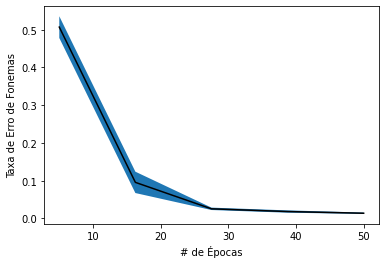

In [16]:
x = np.linspace(5, 50, 5)
plt.plot(x, mean_per, 'k-')
plt.xlabel("# de Épocas")
plt.ylabel("Taxa de Erro de Fonemas")
plt.fill_between(x, mean_per-stdev_per, mean_per+stdev_per)
plt.show()

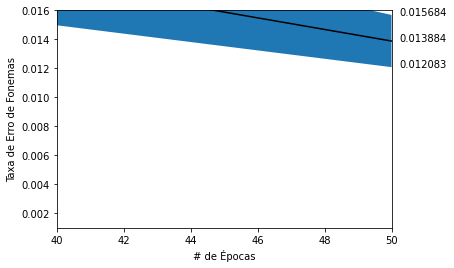

In [17]:
x = np.linspace(5, 50, 5)
plt.plot(x, mean_per, 'k-')
plt.axis([40,50,0.001,0.016])
plt.xlabel("# de Épocas")
plt.ylabel("Taxa de Erro de Fonemas")
plt.fill_between(x, mean_per-stdev_per, mean_per+stdev_per)
plt.annotate('%0.6f' % mean_per.iloc[-1], xy=(1, mean_per.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.6f' % (mean_per.iloc[-1]-stdev_per.iloc[-1]), xy=(1, mean_per.iloc[-1]-stdev_per.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.6f' % (mean_per.iloc[-1]+stdev_per.iloc[-1]), xy=(1, mean_per.iloc[-1]+stdev_per.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

In [10]:
wordError = pd.DataFrame(wordError)
mean_wer = wordError.mean(axis=1)
stdev_wer = wordError.std(axis=1)

In [11]:
wordError

,lr-5e-05/test-1/cv_0,lr-5e-05/test-1/cv_1,lr-5e-05/test-1/cv_2,lr-5e-05/test-1/cv_3,lr-5e-05/test-1/cv_4,lr-5e-05/test-2/cv_0,lr-5e-05/test-2/cv_1,lr-5e-05/test-2/cv_2,lr-5e-05/test-2/cv_3,lr-5e-05/test-2/cv_4,lr-5e-05/test-3/cv_0,lr-5e-05/test-3/cv_1,lr-5e-05/test-3/cv_2
0,0.965613,0.976125,0.972749,0.969907,0.969193,0.975339,0.973356,0.966885,0.970944,0.970232,0.967697,0.966090,0.976544
1,0.660646,0.661246,0.704381,0.631961,0.577016,0.620007,0.606920,0.700241,0.600138,0.613707,0.603334,0.558478,NaN
2,0.342827,0.394464,0.336323,0.516084,0.389754,0.362626,0.375087,0.332184,0.547907,0.335756,0.324418,0.335294,NaN
3,0.342480,0.356055,0.404967,0.208232,0.278989,0.276832,0.317647,0.387030,0.203390,0.276220,0.240361,0.269896,NaN
4,0.249739,0.307266,0.209727,0.246282,0.240222,0.245571,0.262284,0.270783,0.215842,0.244029,0.205974,0.232180,NaN
5,0.242445,0.237024,0.281476,0.233137,0.232606,0.251129,0.216263,0.277337,0.247665,0.318449,NaN,NaN,NaN
6,0.208406,0.204152,0.184546,0.151851,0.203877,0.208753,0.211419,0.166609,0.172951,0.200069,NaN,NaN,NaN
7,0.229941,0.207266,0.134874,0.411276,0.218069,0.218479,0.214879,0.127630,0.434798,0.201108,NaN,NaN,NaN


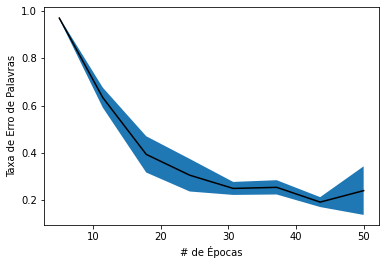

In [84]:
x = np.linspace(5, 50, 8)
plt.plot(x, mean_wer, 'k-')
plt.fill_between(x, mean_wer-stdev_wer, mean_wer+stdev_wer)
plt.xlabel("# de Épocas")
plt.ylabel("Taxa de Erro de Palavras")
plt.show()

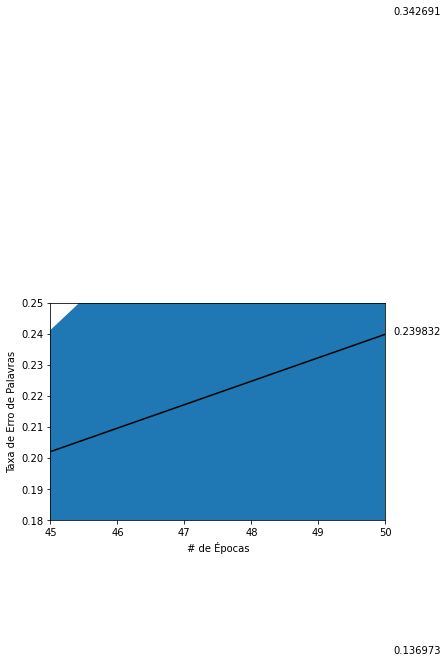

In [85]:
x = np.linspace(5, 50, 8)
plt.plot(x, mean_wer, 'k-')
plt.axis([45,50,0.18,0.25])
plt.xlabel("# de Épocas")
plt.ylabel("Taxa de Erro de Palavras")
plt.fill_between(x, mean_wer-stdev_wer, mean_wer+stdev_wer)
plt.annotate('%0.6f' % mean_wer.iloc[-1], xy=(1, mean_wer.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.6f' % (mean_wer.iloc[-1]-stdev_wer.iloc[-1]), xy=(1, mean_wer.iloc[-1]-stdev_wer.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.6f' % (mean_wer.iloc[-1]+stdev_wer.iloc[-1]), xy=(1, mean_wer.iloc[-1]+stdev_wer.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

In [11]:
def leven(a, b):
    # we must add an additional character at the start of each string
    a = f' {a}'
    b = f' {b}'
    # initialize empty zero array
    lev = np.zeros((len(a), len(b)))
    # now begin iterating through each value, finding the best path
    for i in range(len(a)):
        for j in range(len(b)):
            if min([i, j]) == 0:
                lev[i, j] = max([i, j])
            else:
                # calculate our three possible operations
                x = lev[i-1, j]  # deletion
                y = lev[i, j-1]  # insertion
                z = lev[i-1, j-1]  # substitution
                # take the minimum (eg best path/operation)
                lev[i, j] = min([x, y, z])
                # and if our two current characters don't match, add 1
                if a[i] != b[j]:
                    # if we have a match, don't add 1
                    lev[i, j] += 1
    return lev, lev[-1, -1]

In [12]:
source = "u~ 'dZi.a vo'se a'pre~.dZi ki ajs veR.da'dej.rajs a.mi'za.dZis ko~.tSi~'nu.a~w~ a kreseX, 'mez.mu a 'lo~.gajs dZis'ta~.siajs, i u ki i~'pOX.ta 'na~w~ Eu ki vo.se te~j~.na 'vi.da, majs 'ke~m te~j~.na 'vi.da, a'pre~.dZi ki 'na~w~ 'te~.mus ki mu'daR dZi a'mi.gus, si ko~.pre.e~'dER.mus ki uz a'mi.gus 'mu.da~w~"
target = "u~ 'dZi.a vo'se a'pre~.dZi ki ajs veR.da'dej.rajs a.mi'za.dZis ko~.tSi~'nu.a~w a kreseX, 'mez.mu a 'lo~.gajs dZis'ta~.siajs, i u ki i~'pOX.ta 'na~w Eu ki vo.se te~j.na 'vi.da, majs 'ke~m te~j.na 'vi.da, a'pre~.dZi ki 'na~w 'te~.mus ki mu'daR dZi a'mi.gus, si ko~.pre.e~'dER.mus ki uz a'mi.gus 'mu.da~w"
levenMat, levenDist = leven(source, target)

In [16]:
len(source)

307

In [13]:
levenMat

array([[  0.,   1.,   2., ..., 299., 300., 301.],
       [  1.,   0.,   1., ..., 287., 288., 289.],
       [  2.,   1.,   0., ..., 281., 281., 282.],
       ...,
       [305., 293., 281., ...,   6.,   5.,   6.],
       [306., 294., 282., ...,   7.,   6.,   5.],
       [307., 295., 282., ...,   8.,   6.,   6.]])

/home/santiago/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


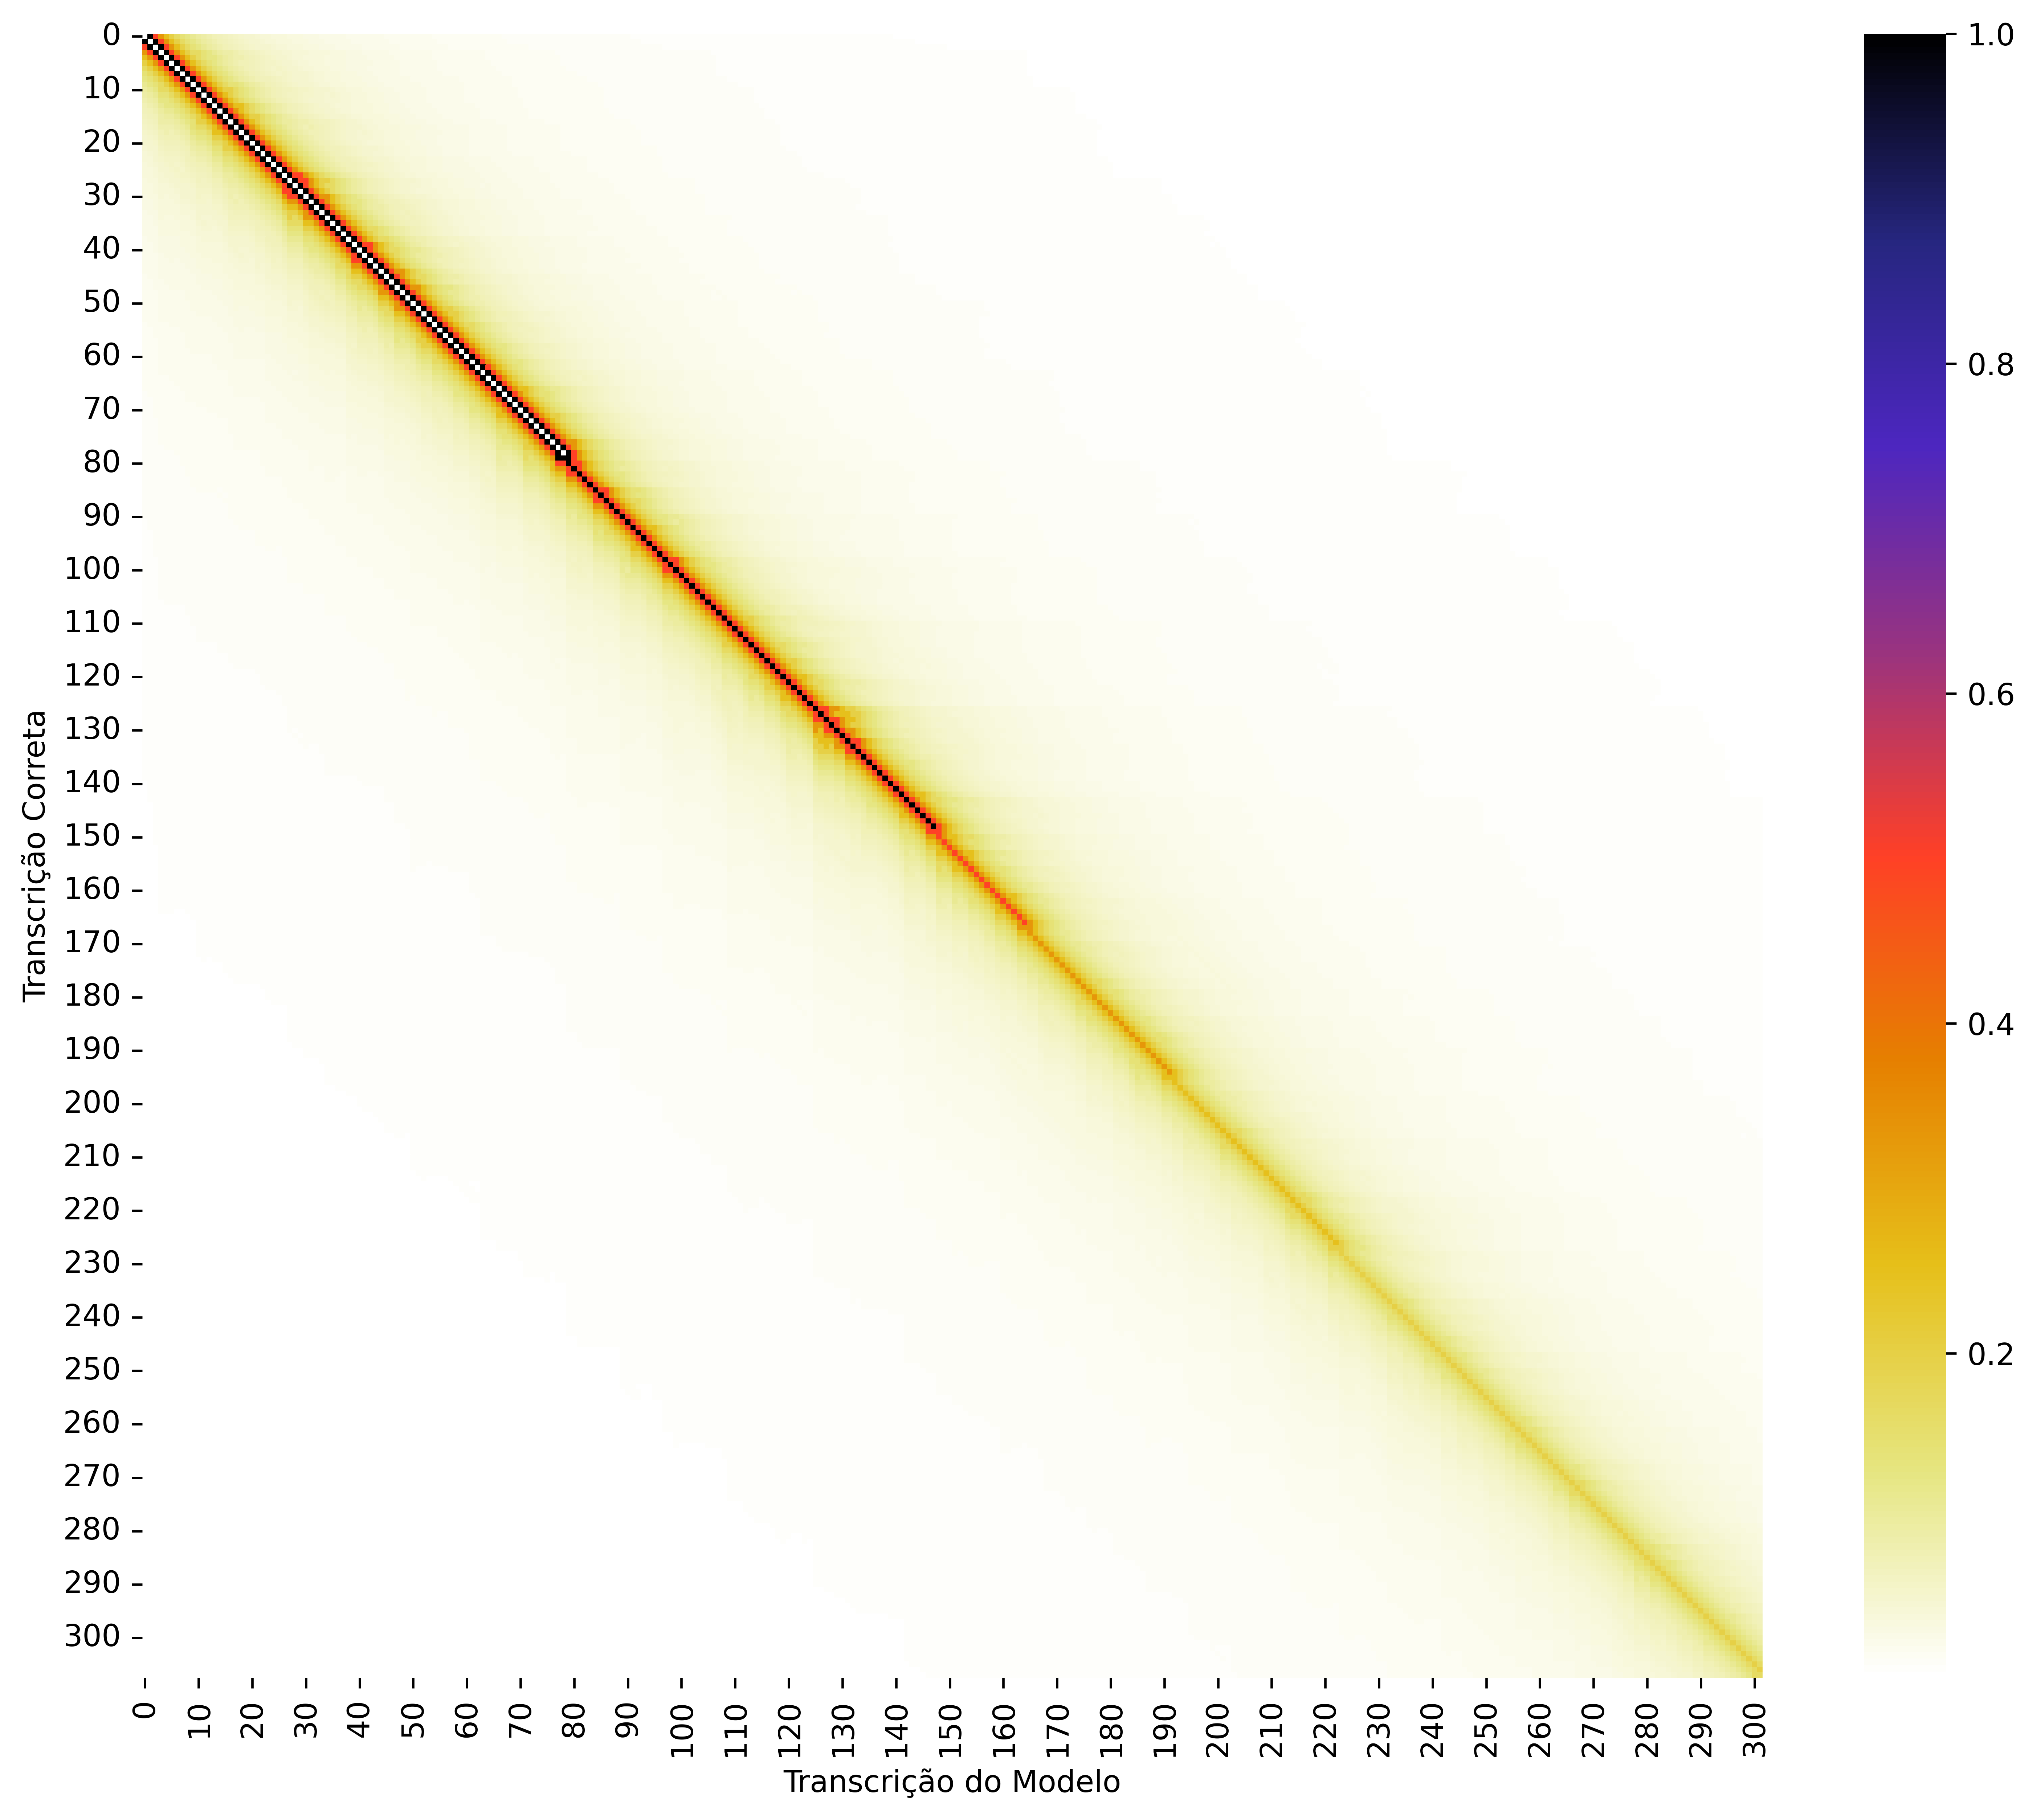

In [21]:
plt.figure(figsize=(12,10), dpi=600)
ax = sns.heatmap(1/levenMat, cmap='CMRmap_r', vmax=1, xticklabels=10, yticklabels=10)
plt.ylabel("Transcrição Correta (")
plt.xlabel("Transcrição do Modelo")
fig = ax.get_figure()
fig.savefig("leven.png")

In [5]:
x = torch.arange(4*5*6)
x.view(4,5,6)

tensor([[[  0,   1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17],
         [ 18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29]],

        [[ 30,  31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40,  41],
         [ 42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53],
         [ 54,  55,  56,  57,  58,  59]],

        [[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[ 90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101],
         [102, 103, 104, 105, 106, 107],
         [108, 109, 110, 111, 112, 113],
         [114, 115, 116, 117, 118, 119]]])

In [6]:
x.view(2,2,5,6)

tensor([[[[  0,   1,   2,   3,   4,   5],
          [  6,   7,   8,   9,  10,  11],
          [ 12,  13,  14,  15,  16,  17],
          [ 18,  19,  20,  21,  22,  23],
          [ 24,  25,  26,  27,  28,  29]],

         [[ 30,  31,  32,  33,  34,  35],
          [ 36,  37,  38,  39,  40,  41],
          [ 42,  43,  44,  45,  46,  47],
          [ 48,  49,  50,  51,  52,  53],
          [ 54,  55,  56,  57,  58,  59]]],


        [[[ 60,  61,  62,  63,  64,  65],
          [ 66,  67,  68,  69,  70,  71],
          [ 72,  73,  74,  75,  76,  77],
          [ 78,  79,  80,  81,  82,  83],
          [ 84,  85,  86,  87,  88,  89]],

         [[ 90,  91,  92,  93,  94,  95],
          [ 96,  97,  98,  99, 100, 101],
          [102, 103, 104, 105, 106, 107],
          [108, 109, 110, 111, 112, 113],
          [114, 115, 116, 117, 118, 119]]]])